In [209]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Prepare DataSet of Gala

In [210]:
df_gala = pd.read_csv("../../../DataSet/Gala/gala.csv")
df_gala["Date"] = pd.to_datetime(df_gala["Date"], format="%d/%m/%Y")
df_gala.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    169 non-null    datetime64[ns]
 1   Gala    169 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


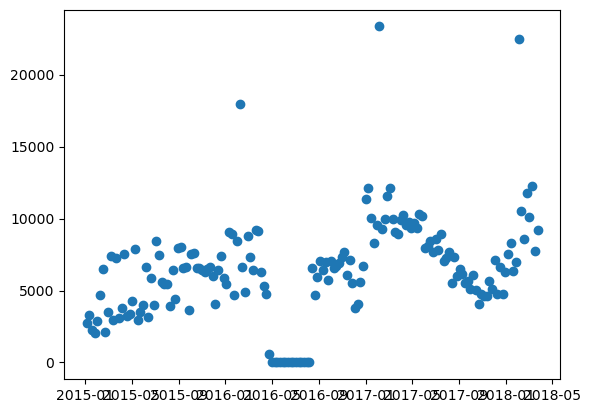

In [211]:
plt.scatter(df_gala["Date"], df_gala["Gala"])
plt.show()

filter that number of apples are more than 1000 and less than 15000

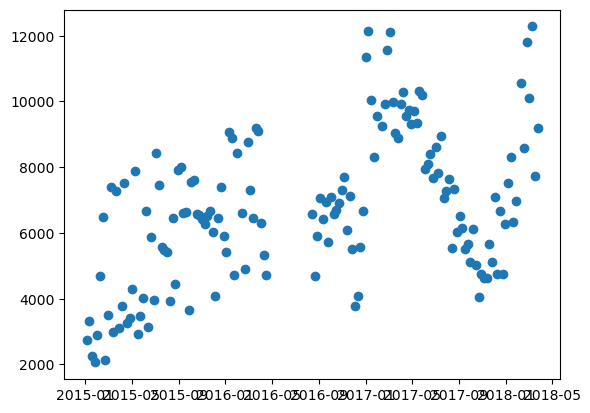

In [212]:
df_gala = df_gala[df_gala["Gala"] <= 15000]
df_gala = df_gala[df_gala["Gala"] >= 1000]
plt.scatter(df_gala["Date"], df_gala["Gala"])
plt.show()

predict next time by using previous time

In [213]:
df_gala["y"] = df_gala["Gala"].shift(-1)
df_gala.dropna(inplace=True)
df_gala["y"] = df_gala["y"].astype("int64")
df_gala.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 167
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    149 non-null    datetime64[ns]
 1   Gala    149 non-null    int64         
 2   y       149 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.7 KB


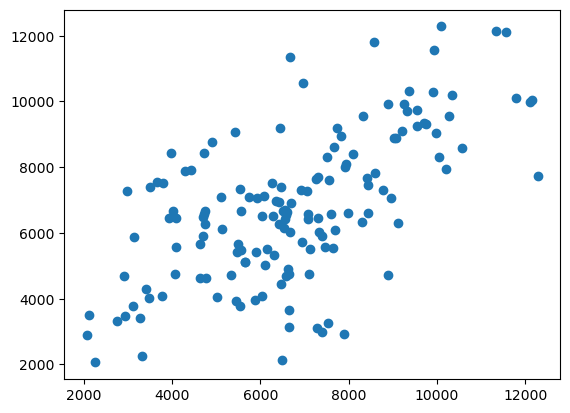

In [214]:
plt.scatter(df_gala["Gala"], df_gala["y"])
plt.show()

In [215]:
x = np.array(df_gala.drop(columns="y"))
y = np.array(df_gala.drop(columns="Gala"))

# xScaler = StandardScaler().fit(x)
# yScaler = StandardScaler().fit(y)
# x = xScaler.transform(x)
# y = yScaler.transform(y)

In [224]:
def findBestRandomState(r,t, x, y):
    random = 0
    a = 100

    model = LinearRegression()
    for _ in range(r,t):
        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=_)
        model.fit(x_train, y_train)

        y_predict = model.predict(x_test)
        if (buff := mean_absolute_error(y_test, y_predict)) < a:
            a = buff
            random = _
    print(a, random)

findBestRandomState(0, 10000, x[:, 1:], y[:, 1:])

100 0


In [217]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

x_train = np.array(sorted(x_train, key=lambda x: x[0]))
x_test = np.array(sorted(x_test, key=lambda x: x[0]))
y_train = np.array(sorted(y_train, key=lambda x: x[0]))
y_test = np.array(sorted(y_test, key=lambda x: x[0]))

### Train model of Gala apples

In [218]:
model = LinearRegression()
model.fit(x_train[:, 1:], y_train[:, 1:])

LinearRegression()

Mean Absolute Error: 1419.9520245489325
The Mean Square Error: 3642487.973197618
The R2 score: 0.2191749538605947


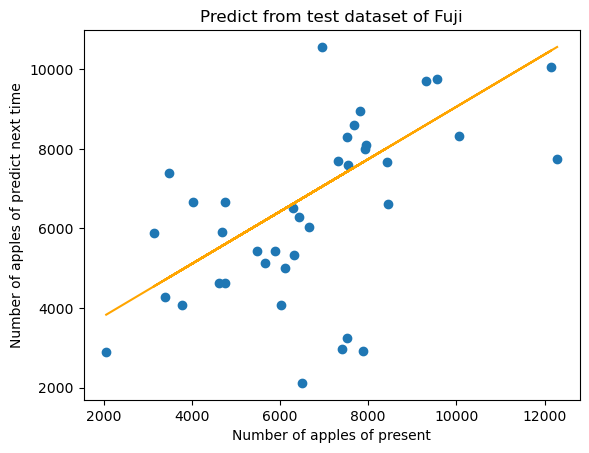

In [219]:
y_predict = model.predict(x_test[:, 1:])
print(f"Mean Absolute Error: {mean_absolute_error(y_test[:, 1:], y_predict)}")
print(f"The Mean Square Error: {mean_squared_error(y_test[:, 1:], y_predict)}")
print(f"The R2 score: {r2_score(y_test[:, 1:], y_predict)}")

plt.scatter(x_test[:, 1:], y_test[:, 1:])
plt.plot(x_test[:, 1:], y_predict, color="orange")
plt.xlabel("Number of apples of present")
plt.ylabel("Number of apples of predict next time")
plt.title("Predict from test dataset of Fuji")
plt.show()

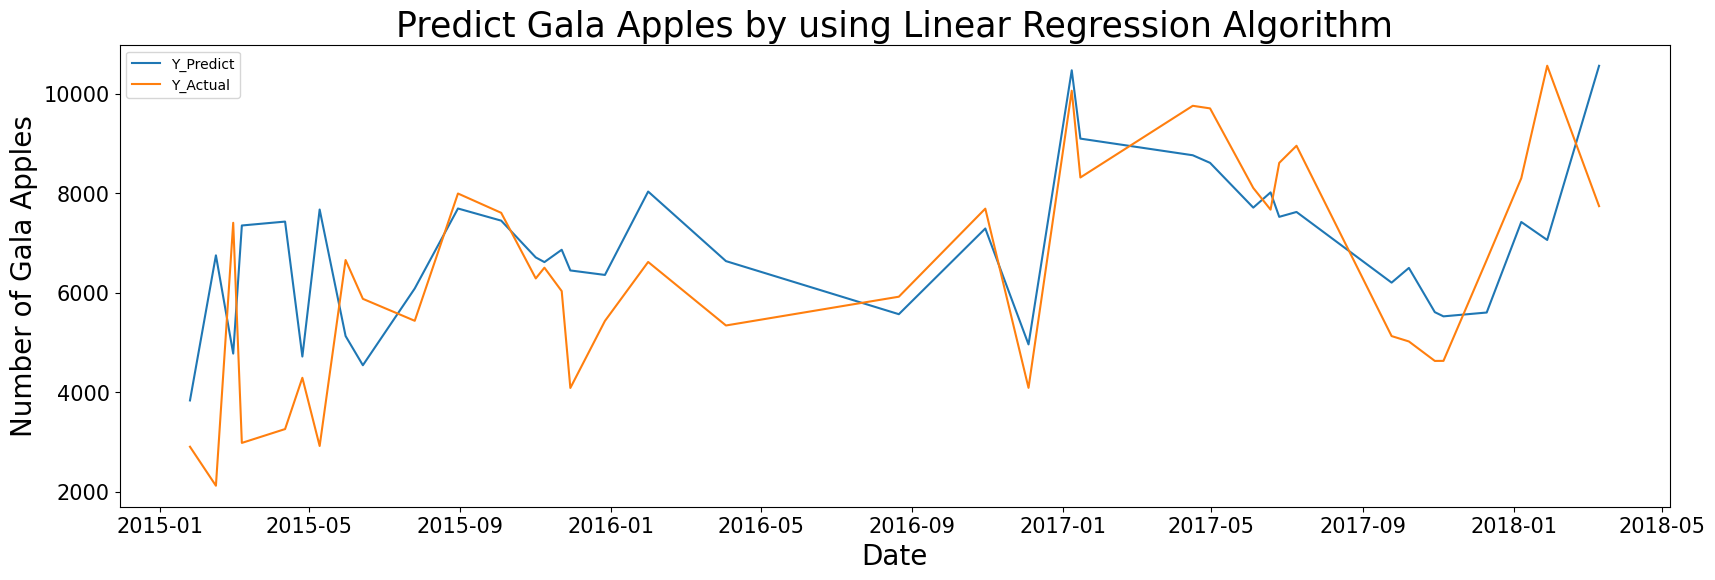

In [220]:
plt.figure(figsize=(20, 6))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(x_test[:, :1], y_predict, label="Y_Predict")
plt.plot(x_test[:,:1], y_test[:, 1:], label="Y_Actual")
plt.xlabel("Date", fontsize=20)
plt.ylabel("Number of Gala Apples", fontsize=20)
plt.title("Predict Gala Apples by using Linear Regression Algorithm", fontsize=25)
plt.legend()
plt.show()

---